# <font color='#eb3483'> Time Series Analysis </font>


You will continue to work with modules from pandas and matplotlib to plot dates more efficiently and with seaborn to make more attractive plots.

We will be doing an analysis of an AirPassengers dataset:
1. Perform exploratory data analysis
2. Trend Analysis
2. Decomposition of data


In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import pandas as pd
import numpy as np

## <font color='#eb3483'> EDA </font>

The data we will be working with today is the the famous dataset that shows the [number of international airline passengers (in thousands)](https://www.kaggle.com/andreazzini/international-airline-passengers), spanning from 1949 to 1961

In [ ]:
df = pd.read_csv("data/AirPassengers.csv")
df.head()

In [ ]:
df.columns = ['Date','Number of Passengers']
df.head(2)

In [ ]:
df.dtypes

In [ ]:
#ooooo lets fix that date using our code we just learnt 

df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.head()

In [ ]:
#Let's add a year and month column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

df.head()

In [ ]:
df.dtypes

In [ ]:
sns.lineplot(data = df,  x='Date', y='Number of Passengers', color="red").set(
    title='Number of US Airline passengers from 1949 to 1960'
)

In [ ]:
#OR make it as a plotly graph 

In [ ]:
import plotly.express as px 
#code format is px.line(data, x, y, title)

px.line(df, x='Date',y='Number of Passengers', 
        title='Number of US Airline passengers from 1949 to 1960')

# <font color='#eb3483'> EXERCISE 1 - in breakout rooms <font>



Choose one of three data sets to work on: (all data sets are in our data folder)
- Australian Beer Production (classic) [Kaggle](https://www.kaggle.com/code/mpwolke/australian-monthly-beer-production/data)
- Grocery store sales [Kaggle](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=transactions.csv) (be aware you either have to aggregate all stores or pick a single store).
- Electricity production [Kaggle](https://www.kaggle.com/datasets/shenba/time-series-datasets)
- Bike share time series data (classic example by day or hour) [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Full bitcoin data set - you'll need to do some googling to reformat the date, fix some missing data, resample and perhap even limit this dataset. It's pretty large [Kaggle](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data). (only choose this option if you are on the fast coder side of things).


No solutions to these - play with data like in the real world.

In [ ]:
# Import the data set
df = pd.read_csv('data/Electricity/Electric_Production.csv')
df.DATE = pd.to_datetime(df.DATE, infer_datetime_format=True)
df.head()

In [ ]:
# make sure the timestamp is in the right format
df.rename(columns = {'IPG2211A2N':'Production'}, inplace=True)
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month

In [ ]:
# resample it if you need/desire
df.dtypes

In [ ]:
# double check for missing data. 

import matplotlib.pyplot as plt

# px.line(df, x='DATE',y='Production', 
#         title='Electricity Production')
my_colours = sns.color_palette('hls', 19)

data = df[df['year'] >= 2000]
print(len(data.year.unique()))
ax = sns.relplot(data=data, x='month', y='Production', kind='line', hue='year', palette=my_colours)
plt.title("Electricity Production by Year")
plt.show()

# <font color='#eb3483'> Understanding the time series <font>


### <font color='#eb3483'> 1. Components <font>

Time series can be thought as a (linear or non-linear) composition of 4 components: **trend**, **cyclical**, **seasonal** and **irregular**

$$Y_t = Trend + Cyclical + Seasonal + Irregular$$

Or

$$Y_t = Trend \cdot Cyclical \cdot Seasonal \cdot Irregular$$

Or another non-linear combination of all four.

### <font color='#eb3483'>  1.1. Trend </font>

The trend is the component of the time series that allows us to see if, in general, the dependent variable we are observing is increasing, without taking into consideration local flutuations. Usually, people look at the trend to see if the mean value of a series is (monotonically) increasing or decreasing. The trend can be modelled as a linear or non-linear process, even though people prefer to assume it is linear.

In [ ]:
#Visualize the data
px.line(df, x='Date', y='Number of Passengers', 
        title='Number of US Airline passengers from 1949 to 1960',
        height=450, width =800
)

In this time series it looks like we have a positive trend. 
Let’s take a closer look. 

We can fit a trend in plotly

In [ ]:
px.scatter(df, x=df.index, y='Number of Passengers', trendline="lowess", height = 400, width = 800)

### <font color='#eb3483'> 1.2. Cyclical </font>

The cyclical component is, as the name states, a time series that exhibits a behavior that repeats in non-regular time intervals. For example, the performance of the world economy in the 20st century would exhibit a strong cyclical component with non-regular cycles (remember the crisis at the 80's and 2007).



### <font color='#eb3483'> 1.3. Seasonal </font>

Unlike the cyclical component, the seasonal component changes at a fixed rate. For example, the bookings in hotels in certain cities have well known maxima (Autumn) and minima (Summer). 


Let's have a look at the seasonality in the airlines data

In [ ]:
#Looking at patterns in each year over the 12 months

my_colours = sns.color_palette("hls", 12)
sns.relplot(data=df, x="month", y="Number of Passengers", 
            kind= "line", hue="year", palette = my_colours)

Around June-July, we get the peak and around October, we get the period with less passengers. 

### <font color='#eb3483'> 1.4. Irregular </font>

After accounting for all the previous components, the remaining component, called *irregular* or *residual*, won't have any pattern. This part of the time series is considered noise. You might be thinking that this component is useless. But, in fact, several modelling techniques analyze this component in order to check a better model can be created.

## <font color='#eb3483'> EXERCISE STEP 2: Break out rooms </font>


In [ ]:
# Plot your time series (seaborn or plotly)

In [ ]:
# Is there a trend

In [ ]:
# See if you can find some seasonality (month, day of week, time of day etc).

-------------

## <font color='#eb3483'> Seasonal Decomposition </font>

We can use time series analysis to get a better understanding of the components. But we need to know whether our times series is additive or miltiplicative)

We saw the two ways of combining the time series components: 

additive ($Y = T + C + S + I$)    
and multiplicative ($Y = T \cdot C \cdot S \cdot I$). 

But...how do we know if our time series is additive or multiplicative? Citing [Hyndman & Athanasopoulos](https://otexts.org/fpp2/components.html)

> _The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the **variation around the trend-cycle**, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series._

We need to choose if we will use `model=additive` or `model=multiplicative`. In order to do that, we have to look at our time series and follow the Hyndman & Athanasopoulos guidelines

<div>
<img src="attachment:image.png" width="700"/>
</div>

<div>
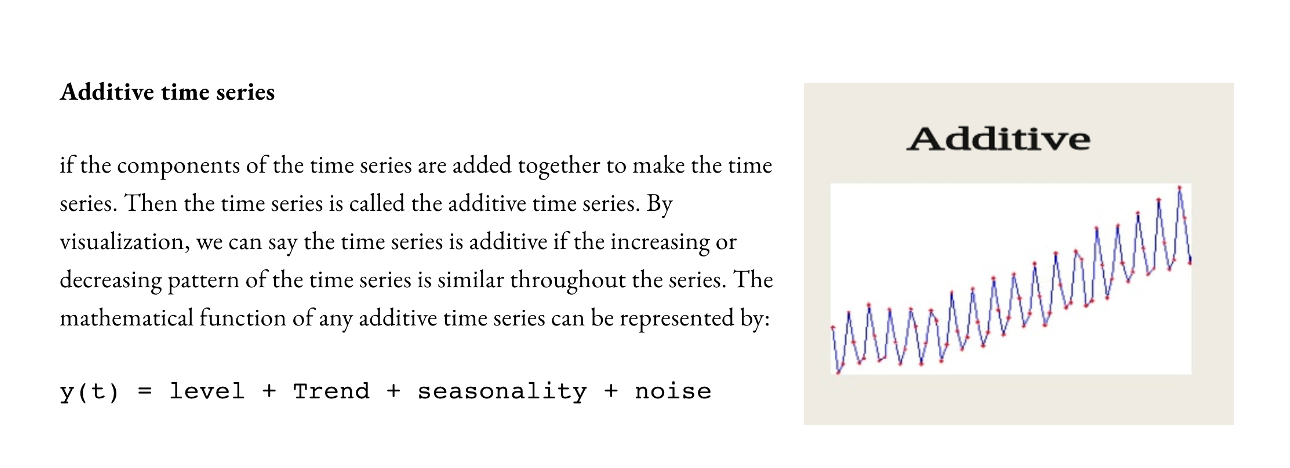
</div>

<div>
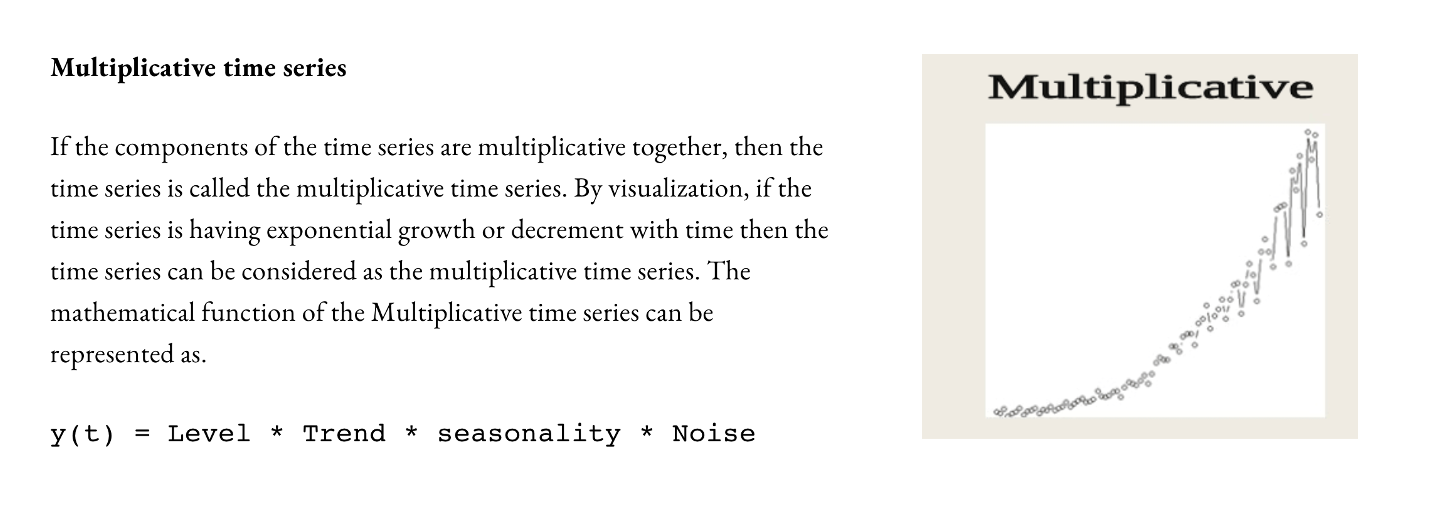
</div>

In [ ]:
#lets check out our data set
px.line(df, x='Date', y='Number of Passengers', height=350, width = 700)

The variance of this time series increases throughout time (the peaks and troughs get wider and wider apart). 

As such, let's use the multiplicative model for decomposition.

So now we can use a time series model to decompose the components.

There are several ways to implement this: using [moving averages](https://otexts.org/fpp2/classical-decomposition.html), [X11](https://otexts.org/fpp2/x11.html), [SEATS](https://otexts.org/fpp2/seats.html) and [STL](https://otexts.org/fpp2/stl.html). Here we will use the moving averages approach that was implemented in [statsmodel](https://www.statsmodels.org/stable/index.html)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse

#import matplotlib.pyplot as plt

In [ ]:
df=df.set_index('Date').drop(["year", "month"], axis=1)
df.head()

In [ ]:
decomposition = seasonal_decompose(df["Number of Passengers"], model='multiplicative')
#decomposition

In [ ]:
decomposition.plot()


In [ ]:
decomposition.trend.head(10)

In [ ]:
decomposition.seasonal.head(10)

In [ ]:
decomposition.resid.head(10)

We can reconstruct the original ts by multiplying its components (multiplicative)

In [ ]:
df.plot(label="original", linestyle ="dashed")
(decomposition.trend * decomposition.resid * decomposition.seasonal).plot(label="recomposed", linestyle="dashed")
sns.mpl.pyplot.legend();

## <font color='#eb3483'> EXERCISE STEP 3: Break out rooms </font>


In [ ]:
# Do a decomposition on your data set to assess the various components. (You dont need to recreate the time series - that's just to show you whats at work)

# AMAZING!

with this object, we have access to the estimation of the following components: 
* Trend-Cyclical
* Seasonal
* Irregular



In [ ]:
decomposition.trend.head(10)

In [ ]:
decomposition.seasonal.head(10)

In [ ]:
decomposition.resid.head(10)

We can reconstruct the original ts by multiplying its components (multiplicative)

In [ ]:
df.plot(label="original", linestyle ="dashed")
(decomposition.trend * decomposition.resid * decomposition.seasonal).plot(label="recomposed", linestyle="dashed")
sns.mpl.pyplot.legend();